# RQ1 Does SATD in code comments correlate with high code complexity?

In [84]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

#### Compare the complexity change in file changes where the number of SATD comments in the file increases with changes where that is not the case.

In [87]:
df1 = pd.read_excel('final_jessie.xlsx')
df2 = pd.read_excel('final_commons-vfs  (2).xlsx')
df3 = pd.read_excel('final_javalin.xlsx')
df = pd.concat([df1, df2, df3], axis=0)

In [88]:
df

,hash,file_name,method_name,Date,before_satd,before_ccn,after_satd,after_ccn,commit_message
0,989f346ee39bc738e8ff1cbe2c08e6aad2aecd11,DefaultSessionManager.java,DefaultSessionManager::DefaultSessionManager,commit.committer_date,0,1,0,1,Changed things to be more dynamic
1,989f346ee39bc738e8ff1cbe2c08e6aad2aecd11,DefaultSessionManager.java,DefaultSessionManager::onClose,commit.committer_date,0,1,0,1,Changed things to be more dynamic
2,989f346ee39bc738e8ff1cbe2c08e6aad2aecd11,DefaultSessionManager.java,DefaultSessionManager::onOpen,commit.committer_date,0,1,0,1,Changed things to be more dynamic
3,989f346ee39bc738e8ff1cbe2c08e6aad2aecd11,DefaultSessionManager.java,DefaultSessionManager::broadcast,commit.committer_date,0,1,0,1,Changed things to be more dynamic
4,989f346ee39bc738e8ff1cbe2c08e6aad2aecd11,EventStreamServlet.java,EventStreamServlet::init,commit.committer_date,0,1,0,2,Changed things to be more dynamic
...,...,...,...,...,...,...,...,...,...
437,09764abbcd8b9973063b45a9f61cf80cfdde900a,JavaTest.java,JavaTest::instantiate_JavalinTestTool,commit.committer_date,0,1,0,1,[testtools] Make it possible to instantiate a ...
438,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exceptions_in_test_code_get_rethrown,commit.committer_date,0,1,0,1,[testtool] Add test cases for exception handli...
439,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exceptions_in_handler_code_are_caugh...,commit.committer_date,0,1,0,1,[testtool] Add test cases for exception handli...
440,a0510d8c7e81c438ff66249f183be9aa8c80d60c,JavaTest.java,JavaTest::exception_in_handler_code_is_include...,commit.committer_date,0,1,0,2,[testtool] Add test cases for exception handli...


In [89]:
def calculate_diff_satd_ccn(df):
    df['diff_ccn']=df['after_ccn']-df['before_ccn']
    df['diff_satd']=df['after_satd']-df['before_satd']
    return df

In [91]:
df=calculate_diff_satd_ccn(df)

In [92]:
df_satd_increased=df[df['diff_satd']>0]
df_satd_not_changed=df[df['diff_satd']==0]
df_satd_decreased=df[df['diff_satd']<0]

In [93]:
df_satd_increased

,hash,file_name,method_name,Date,before_satd,before_ccn,after_satd,after_ccn,commit_message,diff_ccn,diff_satd
1067,3f2f313cd15a9cfaa0c77827d1ede7d0ed2a8a59,FramedSnappyCompressorInputStream.java,FramedSnappyCompressorInputStream::unmask,commit.committer_date,0,2,1,1,COMPRESS-147 checksum verification\n\ngit-svn-...,-1,1


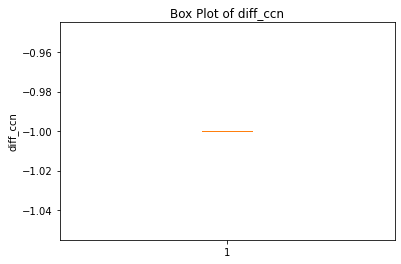

In [94]:
plt.boxplot(df_satd_increased['diff_ccn'])

# Set the y-axis label
plt.ylabel('diff_ccn')

# Set the title of the plot
plt.title('Box Plot of diff_ccn')

# Display the plot
plt.show()

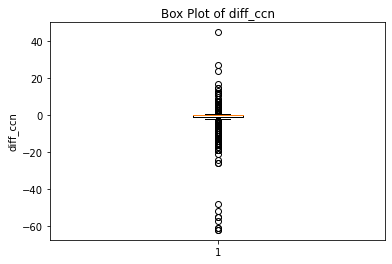

In [95]:
plt.boxplot(df_satd_not_changed['diff_ccn'])

# Set the y-axis label
plt.ylabel('diff_ccn')

# Set the title of the plot
plt.title('Box Plot of diff_ccn')

# Display the plot
plt.show()

In [97]:
sample1 = df_satd_not_changed['diff_ccn']
sample2 = df_satd_increased['diff_ccn']

#### T-test

t-test is used to compare the means of two groups of data.It assumes that the data is normally distributed and the variances of the two groups are equal.

In [98]:
from scipy.stats import ttest_ind

# Calculate the t-test

t_stat, p_value = ttest_ind(sample1, sample2)

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  nan
p-value:  nan


C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Mann-Whitney U test

Mann-Whitney U test, is used to determine if two independent samples have different distributions.

In [34]:
from scipy.stats import ranksums


# conduct the Wilcoxon rank-sum test
u_stat, p_value = ranksums(sample1,sample2)

# print the results
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: -2.32379000772445
p-value: 0.02013675155034634


#### Cohen’s d

Cohen's d is a statistical measure that quantifies the effect size of the difference between two groups or samples. It is a commonly used measure in scientific research to evaluate the magnitude of the difference between groups, regardless of sample size.

In [40]:
def cohen_d(group1, group2):
    """Calculate Cohen's d effect size for two groups"""
    # Calculate the means of the two groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
    # Calculate the pooled standard deviation of the two groups
    n1, n2 = len(group1), len(group2)
    pooled_sd = np.sqrt(((n1-1)*np.var(group1)+(n2-1)*np.var(group2))/(n1+n2-2))
    # Calculate Cohen's d
    d = (mean1 - mean2) / pooled_sd
    return d

In [38]:
d=cohen_d(sample1, sample2)

In [39]:
d

-1.511160379708186